In [13]:
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

ROOT = Path().resolve()/'clf-data'

categories = ['empty', 'not_empty']

Plotando uma imagem qualquer reduzida as dimensões

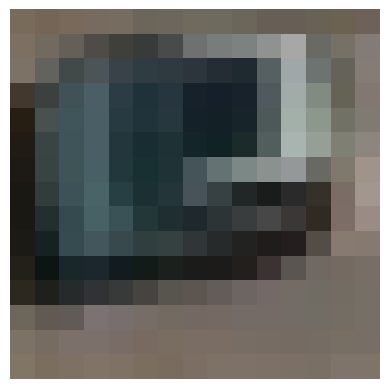

In [14]:
img = imread(r'C:\Users\Alfredo\OneDrive - Universidade Federal de Uberlândia\Livros\Machine Learnig\Capitulo 1 - Preço de Casas\ProcessamentoDeImagens\clf-data\not_empty\00000000_00000003.jpg')
img_resize = resize(img, (15,15))
plt.imshow(img_resize)
plt.axis("off")   # remove eixos
plt.show()

In [17]:
X = []
y = []
for index,category in enumerate(categories):
    for img_path in (ROOT/category).glob("*.jpg"):
        img = imread(img_path)
        img = resize(img, (15,15))
        X.append(img.flatten())
        y.append(index)
X = np.asarray(X)
y = np.asarray(y)

In [23]:
y_1 = (y==1)
y_0 = (y==0)
print(y_1.sum())
print(y_0.sum())
len(y)

3045
3045


6090

Dividindo o conjunto de dados

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.25, random_state=42, shuffle=True, stratify=y)


Iniciando o classificador

GridSearch procura o melhor modelo com base nos parametros definidos

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifier = SVC()

params = [{
    'gamma': [0.01,0.001,0.0001],
    'C' : [1,10,100,1000]
}]

grid_search = GridSearchCV(classifier, params)

grid_search.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"[{'C': [1, 10, ...], 'gamma': [0.01, 0.001, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [29]:
best_classifier = grid_search.best_estimator_

Validando o modelo

In [32]:
y_pred = best_classifier.predict(X_val)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print(f'Acuracia = {accuracy_score(y_pred, y_val)*100}%')
print(f'Precisao = {precision_score(y_pred, y_val)*100}%')
print(f'F1 = {f1_score(y_pred, y_val)*100}%')

Acuracia = 100.0%
Precisao = 100.0%
F1 = 100.0%


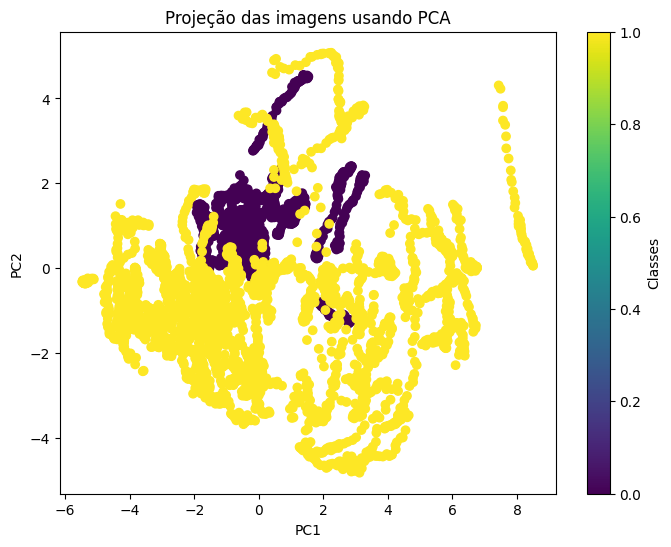

In [40]:
from sklearn.decomposition import PCA

# reduz para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plota
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.colorbar(label="Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projeção das imagens usando PCA")
plt.show()

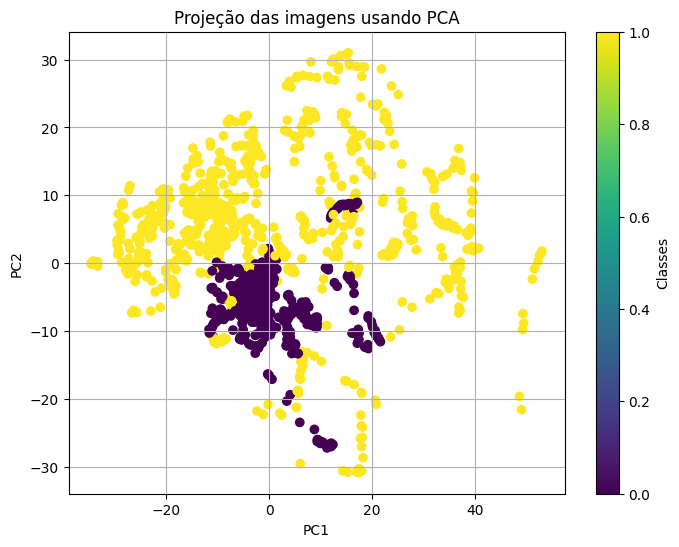

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# reduz para 2 dimensões
pca = PCA(n_components=2)
scale = StandardScaler()
X_scale = scale.fit_transform(X_val)
X_pca = pca.fit_transform(X_scale)
# plota
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_val, cmap='viridis')
plt.colorbar(label="Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projeção das imagens usando PCA")
plt.grid()
plt.show()

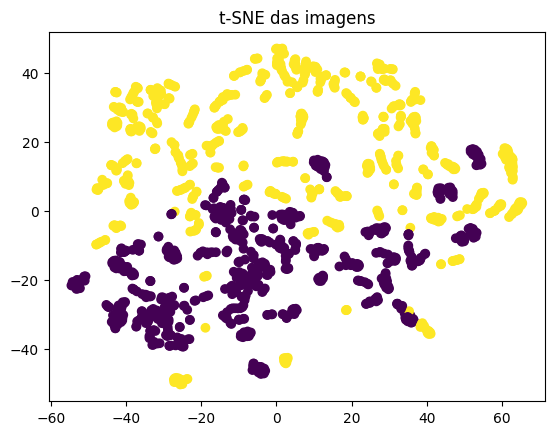

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_scale = scale.fit_transform(X_val)
X_tsne = tsne.fit_transform(X_scale)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_val, cmap='viridis')
plt.title("t-SNE das imagens")
plt.show()


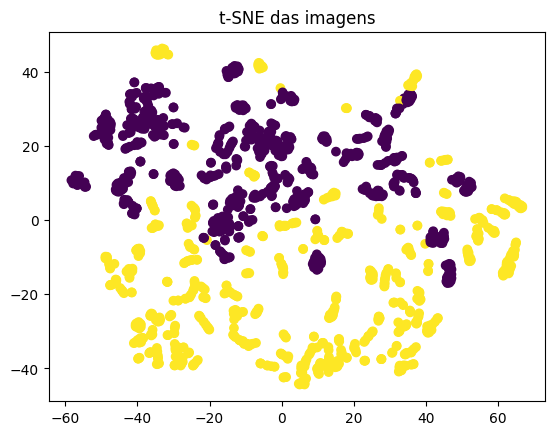

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_val)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_val, cmap='viridis')
plt.title("t-SNE das imagens")
plt.show()


Testando com resize maior

(35, 64, 3)


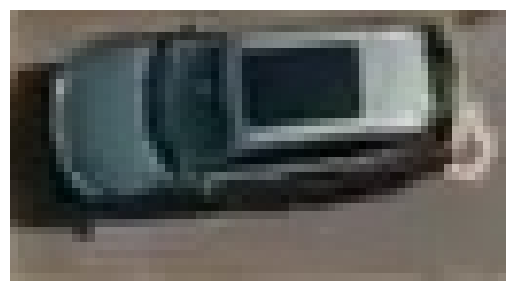

In [69]:
img = imread(r'C:\Users\Alfredo\OneDrive - Universidade Federal de Uberlândia\Livros\Machine Learnig\Capitulo 1 - Preço de Casas\ProcessamentoDeImagens\clf-data\not_empty\00000000_00000003.jpg')
img_resize = resize(img, (35,64))
plt.imshow(img)
print(img.shape)
plt.axis("off")   # remove eixos
plt.show()

In [70]:
X = []
y = []
for index,category in enumerate(categories):
    for img_path in (ROOT/category).glob("*.jpg"):
        img = imread(img_path)
        img = resize(img, (35,64))
        X.append(img.flatten())
        y.append(index)
X = np.asarray(X)
y = np.asarray(y)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.25, random_state=42, shuffle=True, stratify=y)


In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classifier = SVC()

params = [{
    'gamma': [0.01,0.001,0.0001],
    'C' : [1,10,100,1000]
}]

grid_search = GridSearchCV(classifier, params)

grid_search.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"[{'C': [1, 10, ...], 'gamma': [0.01, 0.001, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [59]:
best_classifier = grid_search.best_estimator_

In [60]:
y_pred = best_classifier.predict(X_val)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print(f'Acuracia = {accuracy_score(y_pred, y_val)*100}%')
print(f'Precisao = {precision_score(y_pred, y_val)*100}%')
print(f'F1 = {f1_score(y_pred, y_val)*100}%')

Acuracia = 100.0%
Precisao = 100.0%
F1 = 100.0%


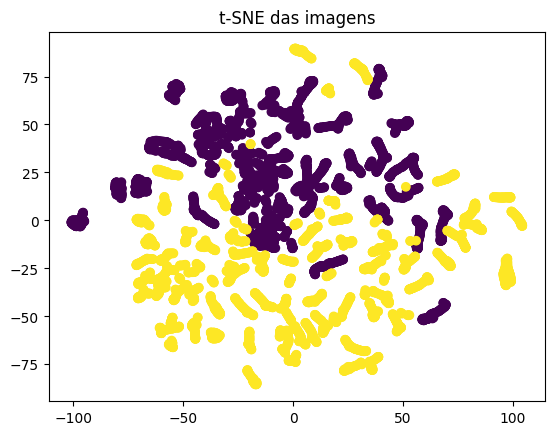

In [63]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis')
plt.title("t-SNE das imagens")
plt.show()


In [73]:
X_tsne.shape

(6090, 2)